# Examen Python: Informes de felicidad de 2015 y 2016

1. Cargar los dos CSV como datasets.

In [346]:
# Import Pandas
import pandas as pd

In [347]:
# Get csv files
happiness2015 = pd.read_csv('2015.csv')
happiness2016 = pd.read_csv('2016.csv')

2. Identificra las columnas de ambos datasets: ¿hay diferencias entre ambos?

In [348]:
# Show happiness 2015
happiness2015.head()

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176

In [349]:
# Show happiness 2016
happiness2016.head()

Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   
2      Iceland  Western Europe               3            7.501   
3       Norway  Western Europe               4            7.498   
4      Finland  Western Europe               5            7.413   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   
2                      7.333                      7.669   
3                      7.421                      7.575   
4                      7.351                      7.475   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   
2                   1.42666  1.18326                   0.86733  0.56624   
3                   1.57744  1.12690                   0.79579  0.59609   
4                   1.40598  1.13464                   0.81091  0.57104   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.44453     0.36171            2.73939  
1                        0.41203     0.28083            2.69463  
2                        0.14975     0.47678            2.83137  
3                        0.35776     0.37895            2.66465  
4                        0.41004     0.25492            2.82596

3. Une ambos dataframes, sin importar que los dos compartan las mismas diferencias.


In [350]:
happinessData = pd.concat([happiness2015, happiness2016], ignore_index=True, join='outer')
happinessData.head()

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  Lower Confidence Interval  \
0     0.29678            2.51738                        NaN   
1     0.43630            2.70201                        NaN   
2     0.34139            2.49204                        NaN   
3     0.34699            2.46531                        NaN   
4     0.45811            2.45176                        NaN   

   Upper Confidence Interval  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN

4. Revisa el número de nulos que hay por cada columna, así como su porcentaje.

In [351]:
# Print Nulls
print(happinessData.isnull().sum())

Country                            0
Region                             0
Happiness Rank                     0
Happiness Score                    0
Standard Error                   157
Economy (GDP per Capita)           0
Family                             0
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      0
Generosity                         0
Dystopia Residual                  0
Lower Confidence Interval        158
Upper Confidence Interval        158
dtype: int64


In [352]:
# Print percentage of nulls
print(happinessData.isnull().sum()/len(happinessData)*100)

Country                           0.00000
Region                            0.00000
Happiness Rank                    0.00000
Happiness Score                   0.00000
Standard Error                   49.84127
Economy (GDP per Capita)          0.00000
Family                            0.00000
Health (Life Expectancy)          0.00000
Freedom                           0.00000
Trust (Government Corruption)     0.00000
Generosity                        0.00000
Dystopia Residual                 0.00000
Lower Confidence Interval        50.15873
Upper Confidence Interval        50.15873
dtype: float64


5. Cambia los valores nulos de las columnas "Lower Confidence Interval" y "Upper Confidence Interval" por un número aleatorio entre el valor mínimo y máximo de la misma columna (un único número, no es necesario uno diferente para cada fila con valor nulo).

In [353]:
# Get Max number of "Lower Confidence Interval" and "Upper Confidence Interval"
max_lower = happinessData['Lower Confidence Interval'].max()
max_upper = happinessData['Upper Confidence Interval'].max()

# Get Min number of "Upper Confidence Interval" and "Lower Confidence Interval"
min_upper = happinessData['Upper Confidence Interval'].min()
min_lower = happinessData['Lower Confidence Interval'].min()

# Print Max Values
print("Lower Confidence Interval Max Value:", max_lower)
print("Upper Confidence Interval Max Value:", max_upper)

# Print Min Values
print("Lower Confidence Interval Min Value:", min_lower)
print("Upper Confidence Interval Min Value:", min_upper)


Lower Confidence Interval Max Value: 7.46
Upper Confidence Interval Max Value: 7.669
Lower Confidence Interval Min Value: 2.732
Upper Confidence Interval Min Value: 3.078


In [354]:
# Import numpy 
import numpy as np

# Change null values of "Lower Confidence Interval" and "Upper Confidence Interval" to a random number between min and max
happinessData['Lower Confidence Interval'] = happinessData['Lower Confidence Interval'].fillna(np.random.randint(min_lower, max_lower))
happinessData['Upper Confidence Interval'] = happinessData['Upper Confidence Interval'].fillna(np.random.randint(min_upper, max_upper))

# Validate Null Values
print(happinessData.isnull().sum())

Country                            0
Region                             0
Happiness Rank                     0
Happiness Score                    0
Standard Error                   157
Economy (GDP per Capita)           0
Family                             0
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      0
Generosity                         0
Dystopia Residual                  0
Lower Confidence Interval          0
Upper Confidence Interval          0
dtype: int64


6. Cambia los valores nulos de la columna "Standard Error" por su media al cuadrado.

In [355]:
# Change Null Values to Mean ** 2
happinessData['Standard Error'] = happinessData['Standard Error'].fillna(happinessData['Standard Error'].mean()**2)
print(happinessData.isnull().sum())

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Lower Confidence Interval        0
Upper Confidence Interval        0
dtype: int64


7. Obtén un resumen estadístico del dataframe sin valores nulos.

In [356]:
happinessData.describe()

Happiness Rank  Happiness Score  Standard Error  \
count      315.000000       315.000000      315.000000   
mean        79.238095         5.378949        0.025161   
std         45.538922         1.141531        0.025851   
min          1.000000         2.839000        0.002293   
25%         40.000000         4.510000        0.002293   
50%         79.000000         5.286000        0.018480   
75%        118.500000         6.269000        0.043940   
max        158.000000         7.587000        0.136930   

       Economy (GDP per Capita)      Family  Health (Life Expectancy)  \
count                315.000000  315.000000                315.000000   
mean                   0.899837    0.892647                  0.594054   
std                    0.410780    0.286718                  0.240790   
min                    0.000000    0.000000                  0.000000   
25%                    0.594900    0.739880                  0.419645   
50%                    0.973060    0.937930                  0.640450   
75%                    1.229000    1.087360                  0.787640   
max                    1.824270    1.402230                  1.025250   

          Freedom  Trust (Government Corruption)  Generosity  \
count  315.000000                     315.000000  315.000000   
mean     0.399896                       0.140532    0.239957   
std      0.150684                       0.115490    0.130077   
min      0.000000                       0.000000    0.000000   
25%      0.295890                       0.061315    0.151430   
50%      0.413190                       0.106130    0.218540   
75%      0.516730                       0.178610    0.311450   
max      0.669730                       0.551910    0.819710   

       Dystopia Residual  Lower Confidence Interval  Upper Confidence Interval  
count         315.000000                 315.000000                 315.000000  
mean            2.212032                   4.639162                   4.237048  
std             0.558728                   1.033074                   1.478727  
min             0.328580                   2.732000                   3.000000  
25%             1.884135                   4.000000                   3.000000  
50%             2.211260                   4.000000                   3.000000  
75%             2.563470                   5.231500                   5.408500  
max             3.837720                   7.460000                   7.669000

8. Muestra de forma gráfica la relación entre la familia y la salud.

Text(65.02350694444445, 0.5, 'Salud(Expectativa de vida)')

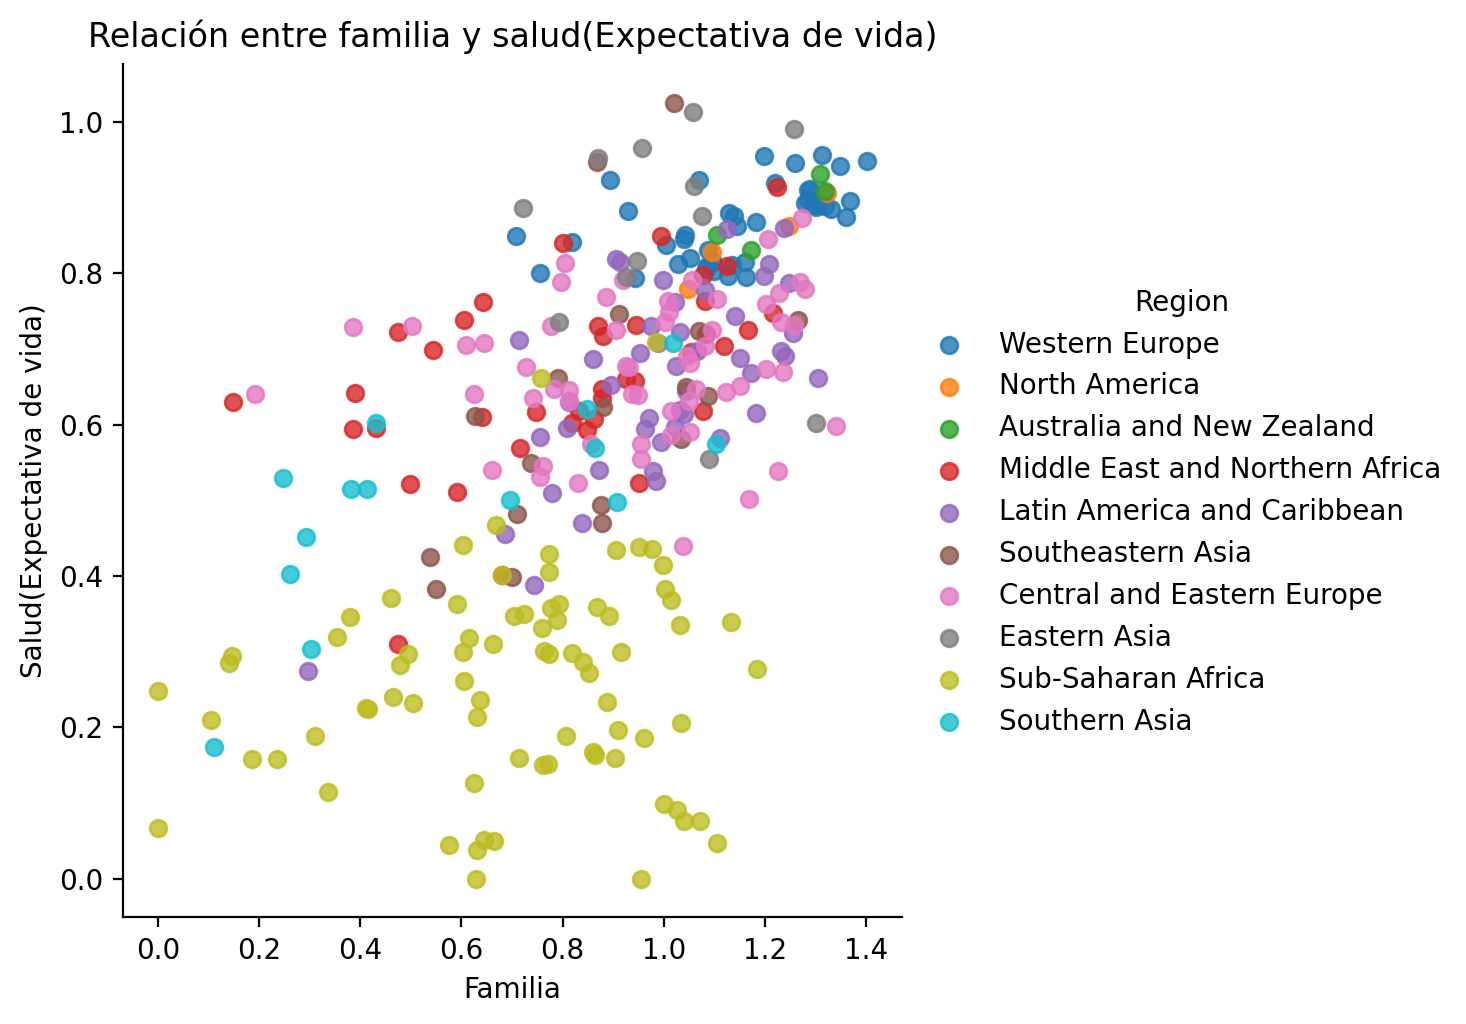

In [357]:
# Import Matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

# Import Seaborn
import seaborn as sns

# Load scatter graph between Family and Health (Life Expectancy) by Region
sns.lmplot(x='Family', y = 'Health (Life Expectancy)', data = happinessData, fit_reg=False, hue = 'Region')

# Load Title and Labels for the graph
plt.title('Relación entre familia y salud(Expectativa de vida)')
plt.xlabel('Familia')
plt.ylabel('Salud(Expectativa de vida)')

9. Muestra de forma gráfica la relación entre la puntuación de felicidad y la confianza (corrupción del gobierno).


Text(65.02350694444445, 0.5, 'Confianza(corrupción del gobierno)')

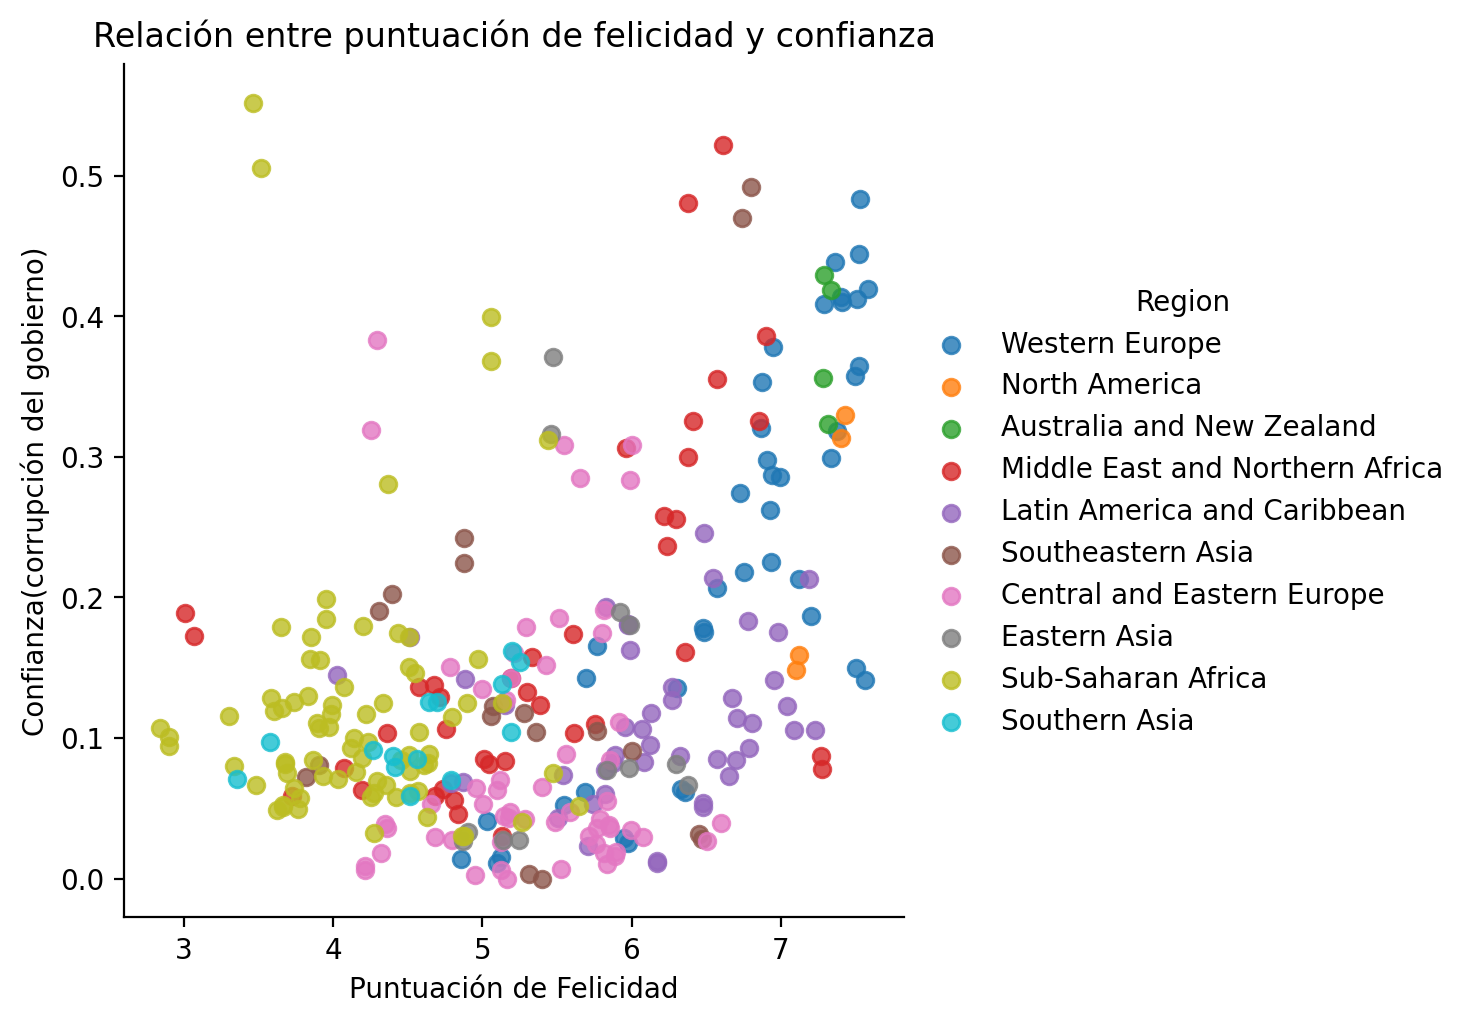

In [358]:
# Load scatter graph between Happiness Score and Trust (Government Corruption) by region
sns.lmplot(x='Happiness Score', y = 'Trust (Government Corruption)', data = happinessData, fit_reg=False, hue = 'Region')

# Load Title and Labels for the graph
plt.title('Relación entre puntuación de felicidad y confianza')
plt.xlabel('Puntuación de Felicidad')
plt.ylabel('Confianza(corrupción del gobierno)')

10. Muestra la matriz de correlación del daframe.

In [359]:
# Get Correlation Matrix
happinessData_corr = happinessData.corr
print(happinessData_corr)

<bound method DataFrame.corr of          Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
310        Benin               Sub-Saharan Africa             153   
311  Afghanistan                    Southern Asia             154   
312         Togo               Sub-Saharan Africa             155   
313        Syria  Middle East and Northern Africa             156   
314      Burundi               Sub-Saharan Africa             157   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587        0.034110                   1.39651  

Using matplotlib backend: QtAgg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


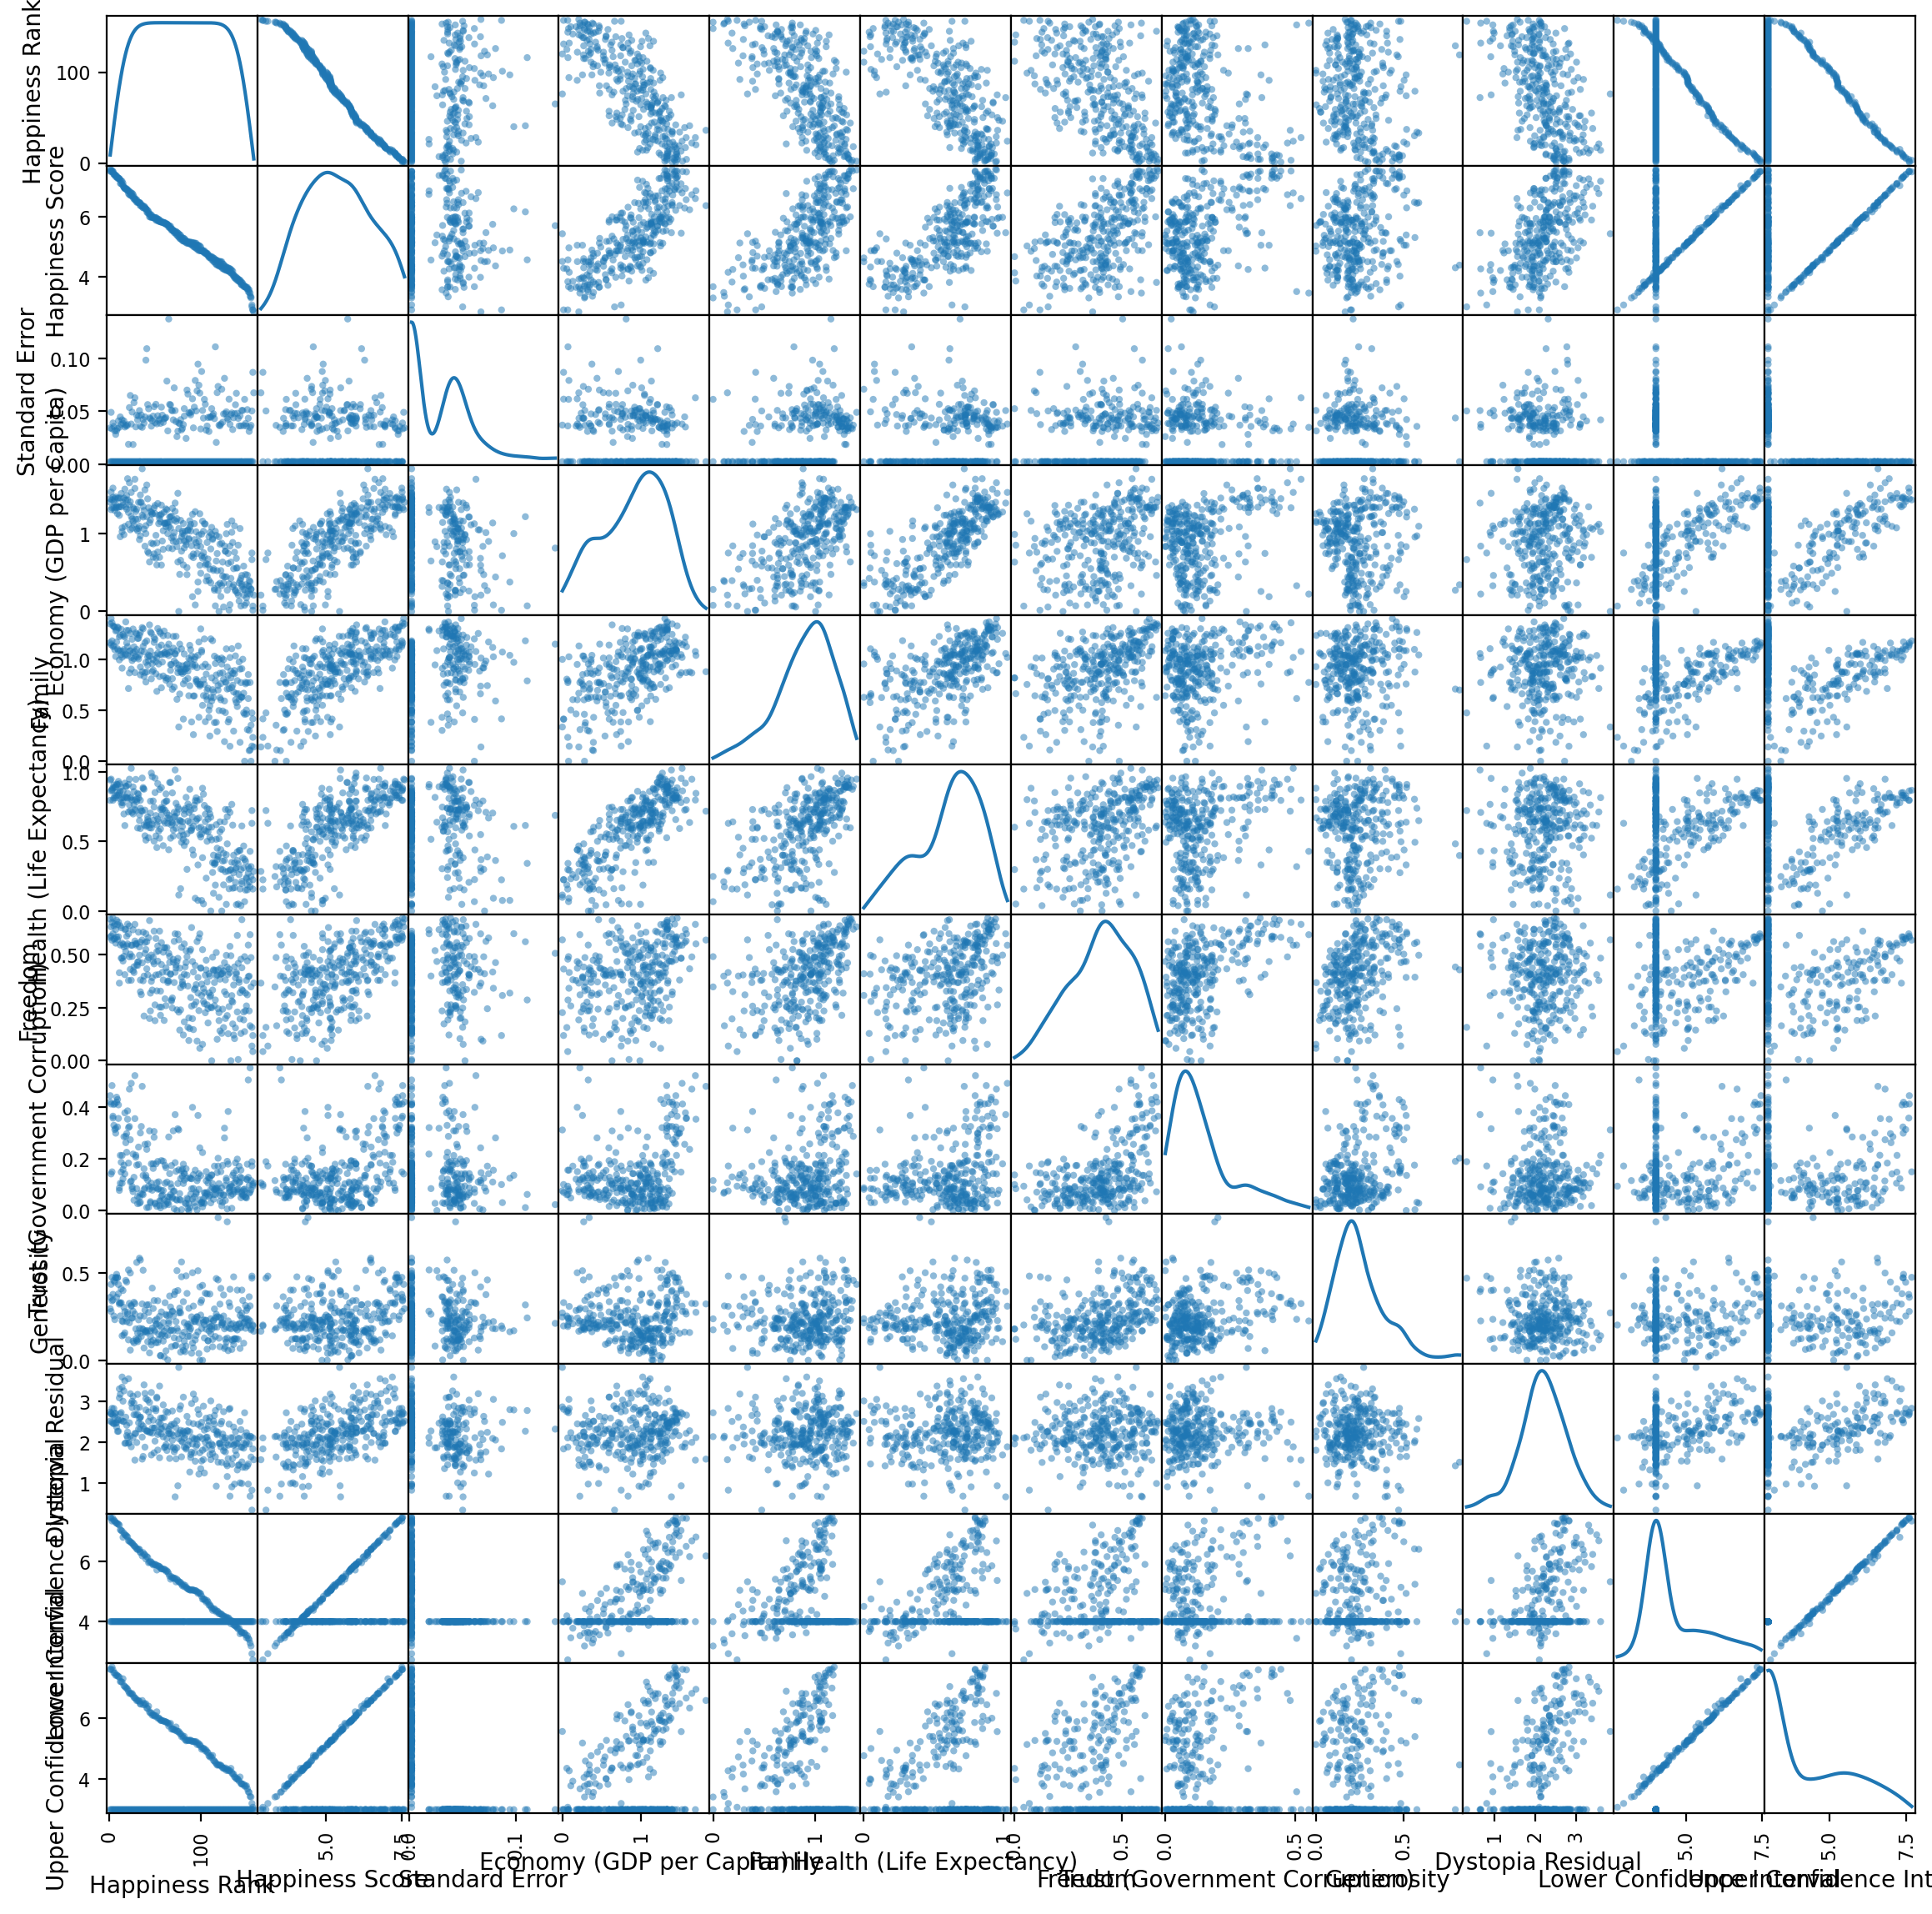

In [360]:
# Config Notebook to show graphs
%pylab
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# import scatter_matrix
from pandas.plotting import scatter_matrix
scatter_matrix(
    happinessData, 
    figsize = (len(happinessData.columns),
    len(happinessData.columns)),
    diagonal = 'kde'
);

11. Tras unir los dataframes, los países aparecerán más de una vez. Muestra agrupado el dataframe por país con el valor máximo de felicidad, sin importar el año.


In [361]:
# Group of countries and their happiness score
happinessCountry = happinessData.groupby('Country')['Happiness Score'].max()
print(happinessCountry)

Country
Afghanistan    3.575
Albania        4.959
Algeria        6.355
Angola         4.033
Argentina      6.650
               ...  
Venezuela      6.810
Vietnam        5.360
Yemen          4.077
Zambia         5.129
Zimbabwe       4.610
Name: Happiness Score, Length: 164, dtype: float64


12. ¿Tiene relación la felicidad con la generosidad? Muéstralo gráficamente a través de la puntuación de libertad.

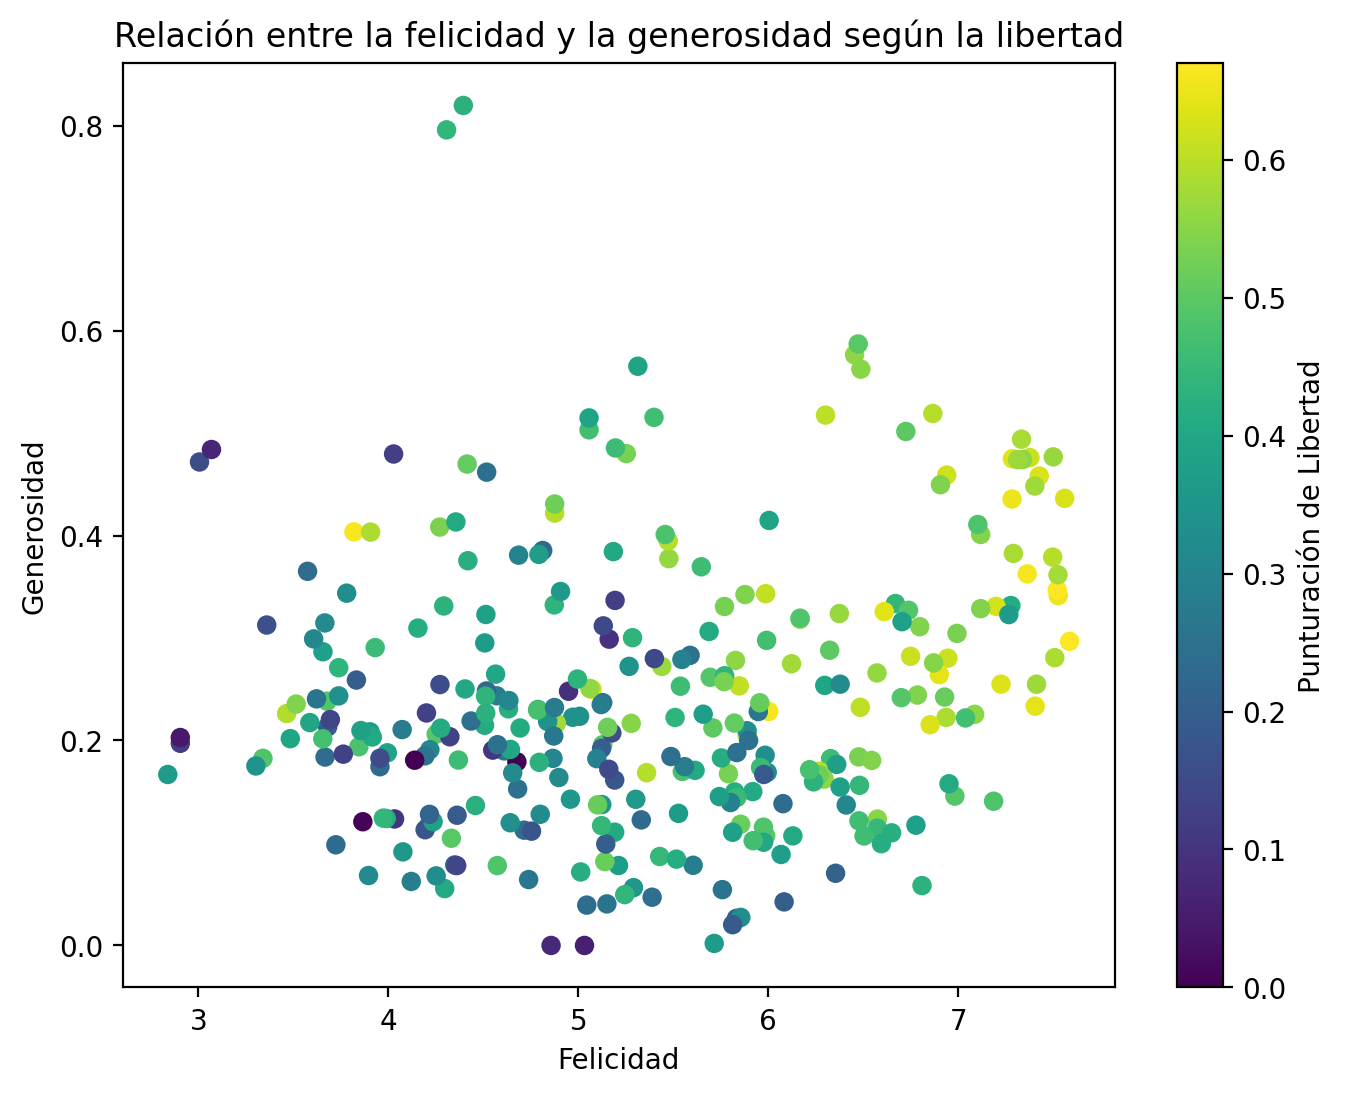

In [362]:
# Create a scatter plot of Happiness Score and Generosity, by Freedom
plt.figure(figsize=(8, 6))
plt.scatter(happinessData['Happiness Score'], happinessData['Generosity'], c=happinessData['Freedom'], cmap='viridis')

# Add labels and title
plt.xlabel('Felicidad')
plt.ylabel('Generosidad')
plt.title('Relación entre la felicidad y la generosidad según la libertad')

# Add a colorbar to show the range of Freedom values
plt.colorbar(label='Punturación de Libertad')

# Show the plot
plt.show()

13. Muestra la distribución del grado de distopía en función de la región.

C:\Users\ramon\AppData\Local\Temp\ipykernel_10152\2632019874.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=happinessData['Dystopia Residual'], y=happinessData['Region'], data=happinessData, palette='Set1')


Text(0, 0.5, 'Región')

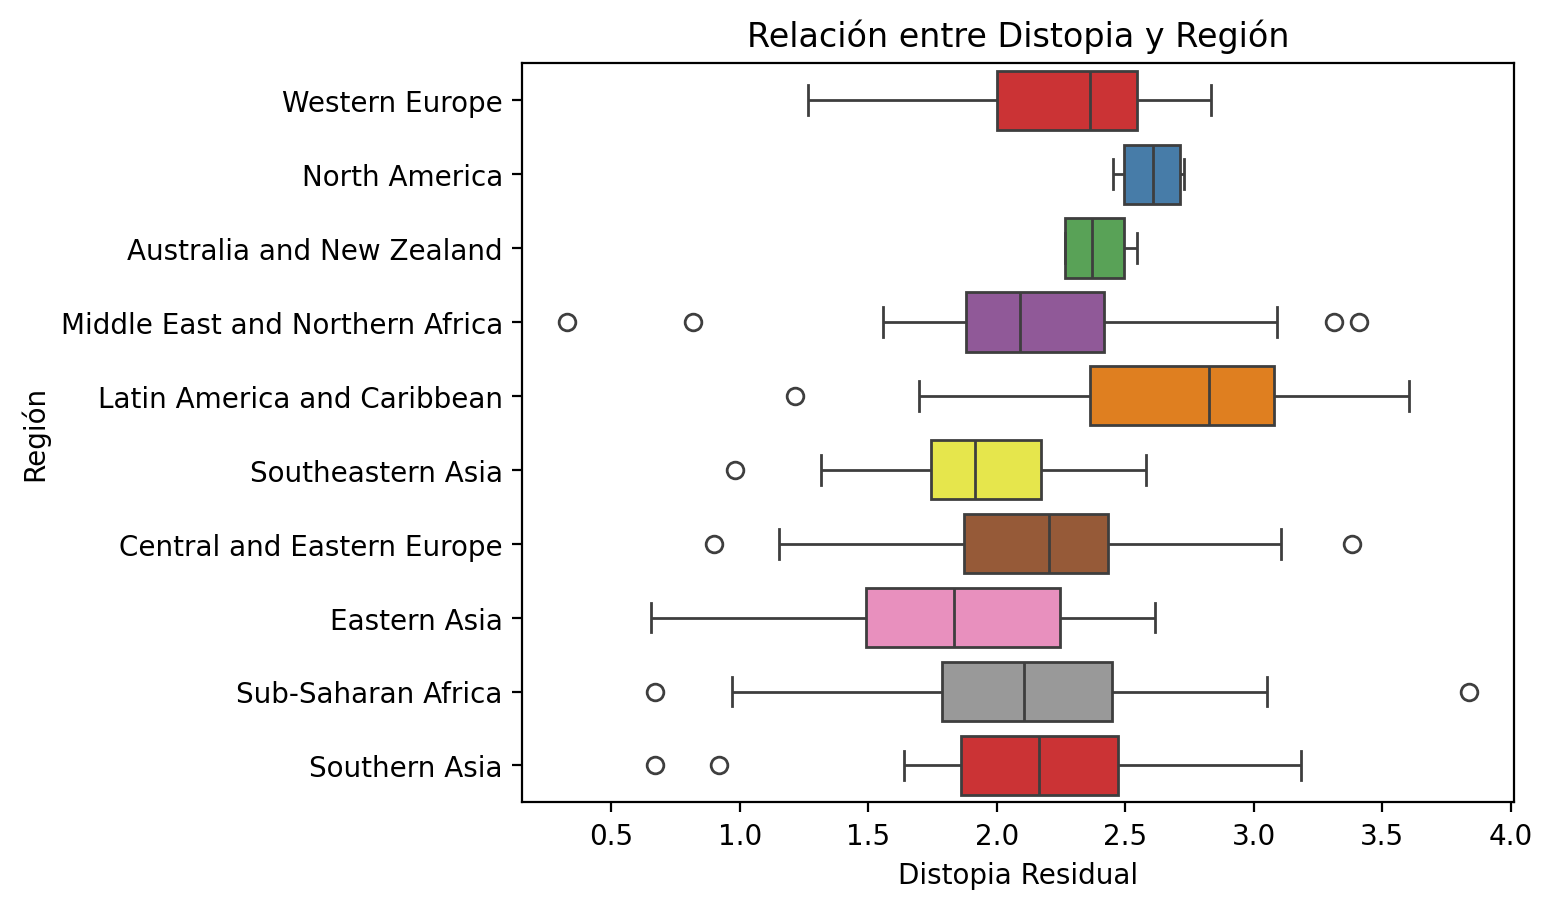

In [363]:
# Show the distribution of Dystopia residual by Region
sns.boxplot(x=happinessData['Dystopia Residual'], y=happinessData['Region'], data=happinessData, palette='Set1')

# Load Title and Labels for the graph
plt.title('Relación entre Distopia y Región')
plt.xlabel('Distopia Residual')
plt.ylabel('Región')